<a href="https://colab.research.google.com/github/snehaav1/HealthCare-Analytics-Disease-Prediction/blob/main/HealthCare_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-7caf292e3a08>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(0, np.nan, inplace=True)
<ipython-input-1-7caf292e3a08>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


Logistic Regression Accuracy: 0.7597
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154

[[82 17]
 [20 35]]
--------------------------------------------------
Random Forest Accuracy: 0.7143
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154

[[73 26]
 [18 37]]
--------------------------------------------------


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:12:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7013
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        99
           1       0.57      0.67      0.62        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.70      0.71       154

[[71 28]
 [18 37]]
--------------------------------------------------


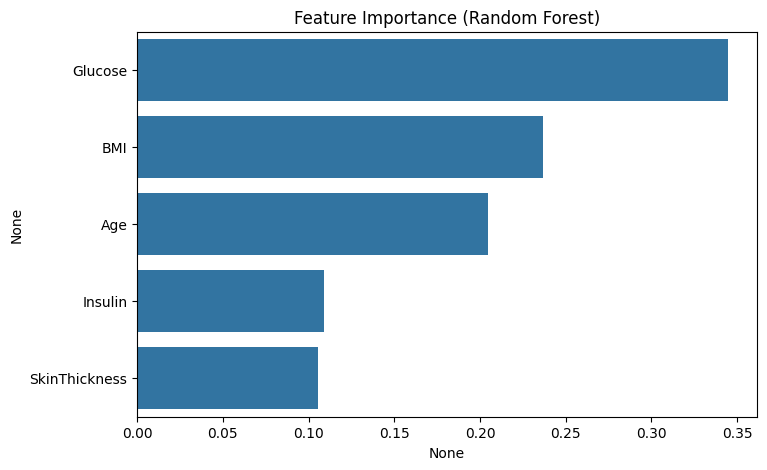

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigree", "Age", "Outcome"]
df = pd.read_csv(url, names=columns)

# Select relevant features (Glucose, BMI, Age, Insulin, SkinThickness)
features = ["Glucose", "BMI", "Age", "Insulin", "SkinThickness"]
X = df[features]
y = df["Outcome"]

# Handle missing values (replace 0 with NaN and impute with median)
X.replace(0, np.nan, inplace=True)
X.fillna(X.median(), inplace=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-"*50)

# Visualizing Feature Importance (Random Forest)
rf = models["Random Forest"]
feature_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance (Random Forest)")
plt.show()


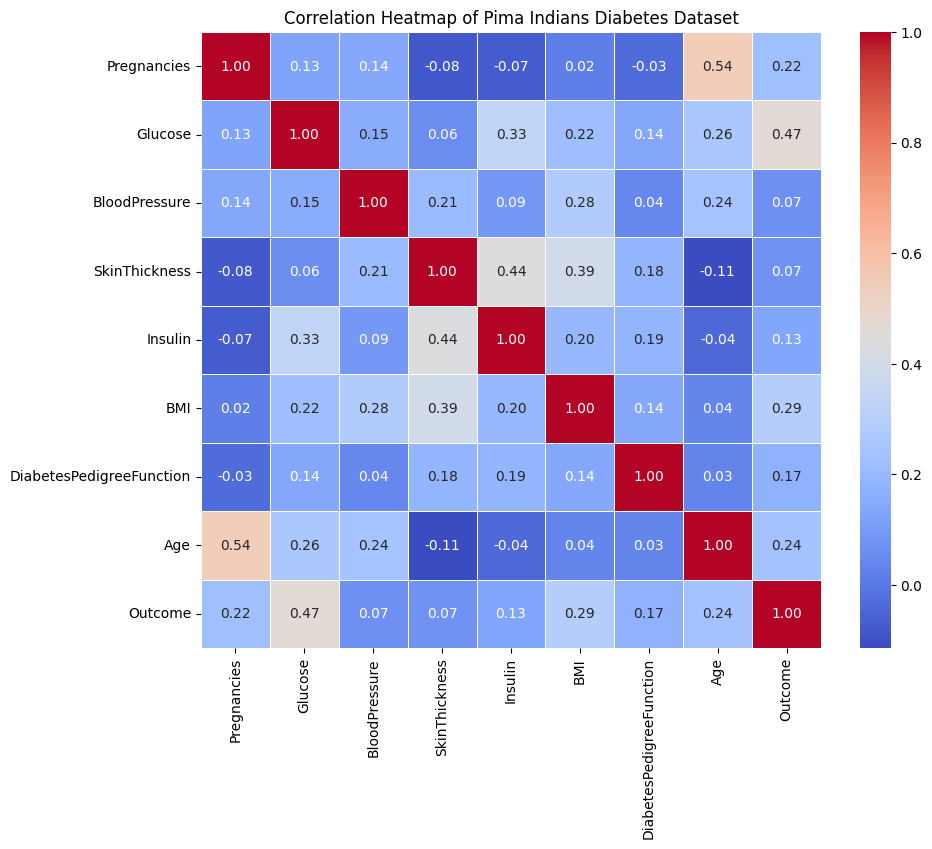

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=column_names)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pima Indians Diabetes Dataset")
plt.show()


In [ ]:
import pandas as pd


url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI",
                "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=column_names)

# making a  statistical summary
summary = df.describe()
print(summary)


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  


| Statistic | Pregnancies | Glucose | BloodPressure | SkinThickness | Insulin | BMI  | DiabetesPedigreeFunction | Age  | Outcome |
|-----------|------------|---------|--------------|--------------|---------|------|-------------------------|------|---------|
| **Count** | 768        | 768     | 768          | 768          | 768     | 768  | 768                     | 768  | 768     |
| **Mean**  | 3.8        | 120.9   | 69.1         | 20.5         | 79.8    | 32.0 | 0.47                    | 33.2 | 0.35    |
| **Std**   | 3.4        | 31.9    | 19.3         | 16.0         | 115.2   | 7.9  | 0.33                    | 11.8 | 0.48    |
| **Min**   | 0.0        | 0.0     | 0.0          | 0.0          | 0.0     | 0.0  | 0.08                    | 21.0 | 0.0     |
| **25%**   | 1.0        | 99.0    | 62.0         | 0.0          | 0.0     | 27.3 | 0.24                    | 24.0 | 0.0     |
| **50%**   | 3.0        | 117.0   | 72.0         | 23.0         | 30.5    | 32.0 | 0.37                    | 29.0 | 0.0     |
| **75%**   | 6.0        | 140.0   | 80.0         | 32.0         | 127.2   | 36.6 | 0.63                    | 41.0 | 1.0     |
| **Max**   | 17.0       | 199.0   | 122.0        | 99.0         | 846.0   | 67.1 | 2.42                    | 81.0 | 1.0     |

### **Interpreting the Results**
- **Count**: All columns have **768** values, meaning there are no missing rows, but zeros in some columns may indicate missing values.
- **Mean & Std (Standard Deviation)**:
  - The **average glucose level is 120.9** (diabetes threshold is typically ≥126).
  - The **BMI average is 32.0**, indicating many participants are overweight.
  - **Pregnancies average is 3.8**, but some women have up to **17** pregnancies.
- **Min/Max**:
  - The **minimum values of Glucose, BloodPressure, SkinThickness, Insulin, and BMI are 0**, which is **likely invalid** (e.g., glucose cannot be zero in a living person). These zeros likely indicate **missing values** that should be handled.
- **Percentiles (25%, 50%, 75%)**:
  - The **median (50%) glucose level is 117**, meaning half of the participants have glucose levels below this.
  - The **75% percentile for glucose is 140**, suggesting that 25% of participants have glucose levels higher than this, indicating possible diabetes risks.

### **Key Takeaways**
- **Zeros in medical values should be treated as missing data** and replaced or imputed properly.
- **Glucose, BMI, and Age show strong variations** in the dataset.
- **Diabetes (Outcome = 1) is present in about 35% of cases (mean = 0.35)**.

